In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
airlines_df=pd.read_excel("C:\\Users\\Mani\\Desktop\\Excelr\\Assignments\\Clustering\\EastWestAirlines.xlsx",sheet_name="data")
airlines_df.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [5]:
#airlines_df=airlines_df.drop('ID#',axis=1)

In [6]:
airlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Balance            3999 non-null   int64
 1   Qual_miles         3999 non-null   int64
 2   cc1_miles          3999 non-null   int64
 3   cc2_miles          3999 non-null   int64
 4   cc3_miles          3999 non-null   int64
 5   Bonus_miles        3999 non-null   int64
 6   Bonus_trans        3999 non-null   int64
 7   Flight_miles_12mo  3999 non-null   int64
 8   Flight_trans_12    3999 non-null   int64
 9   Days_since_enroll  3999 non-null   int64
 10  Award?             3999 non-null   int64
dtypes: int64(11)
memory usage: 343.8 KB


In [31]:
airlines_df=airlines_df.rename({'ID#':'ID','Award?':'Award'},axis=1)

# Data Visualization

Text(0.5, 1.0, 'No of miles eligible for Award Travel')

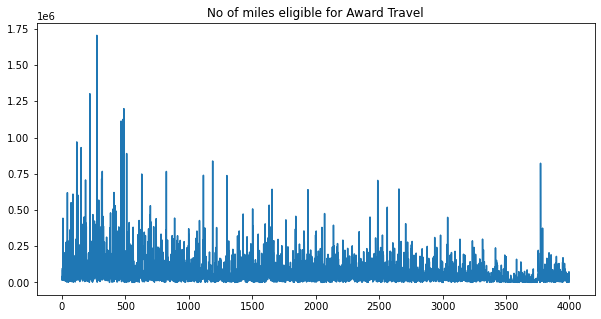

In [8]:
plt.figure(figsize=(10,5))
plt.plot(airlines_df.Balance)
plt.title("No of miles eligible for Award Travel")

Text(0.5, 1.0, 'No of miles counted for topflight Status')

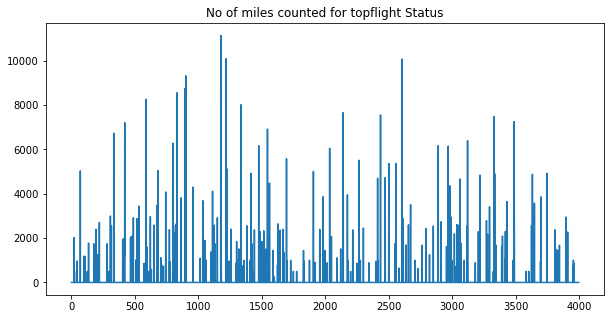

In [9]:
plt.figure(figsize=(10,5))
plt.plot(airlines_df.Qual_miles)
plt.title("No of miles counted for topflight Status")

Text(0.5, 1.0, 'Miles earned with frequency Credit card')

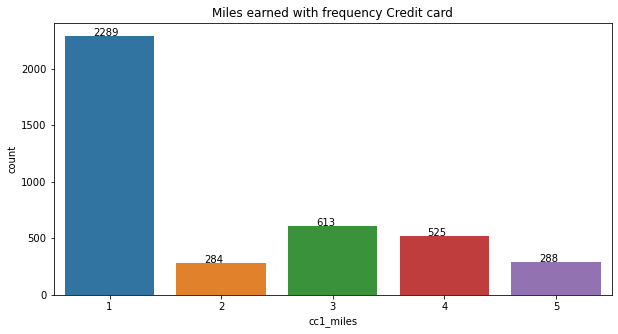

In [10]:
plt.figure(figsize=(10,5))
ax2=sns.countplot(x=airlines_df.cc1_miles)
for p in ax2.patches:
   ax2.annotate(p.get_height(),(p.get_x()+0.25, p.get_height()+0.01))
plt.title("Miles earned with frequency Credit card")

In [11]:
# There are many people who have earned 1 mile from frequency credit card

Text(0.5, 1.0, 'Miles earned with Rewards credit card')

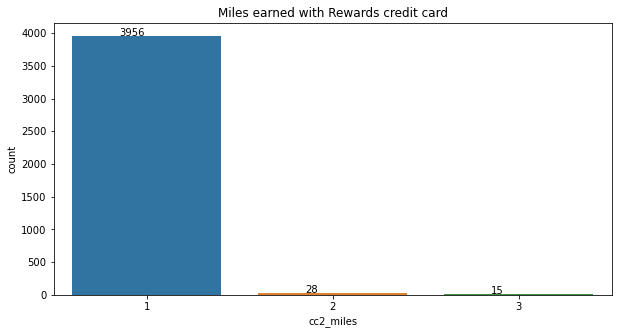

In [12]:
plt.figure(figsize=(10,5))
ax1=sns.countplot(x=airlines_df.cc2_miles)
for p in ax1.patches:
   ax1.annotate(p.get_height(),(p.get_x()+0.25, p.get_height()+0.01))
plt.title("Miles earned with Rewards credit card")

In [13]:
# There are many people who have earned one mile from rewards credit card  and very few who have earnes 2 and 3 miles

Text(0.5, 1.0, 'Miles earned with Small Business credit card')

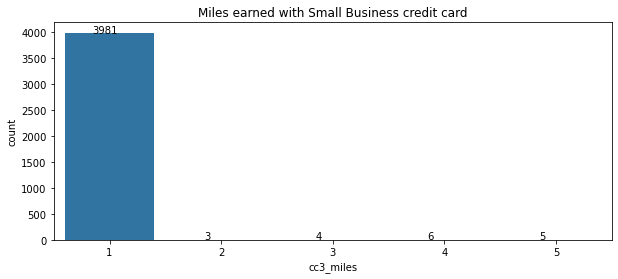

In [14]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x=airlines_df.cc3_miles)

for p in ax.patches:
   ax.annotate(p.get_height(),(p.get_x()+0.25, p.get_height()+0.01))


plt.title("Miles earned with Small Business credit card")

Text(0.5, 1.0, 'Miles earned from non-flight bonous transactions')

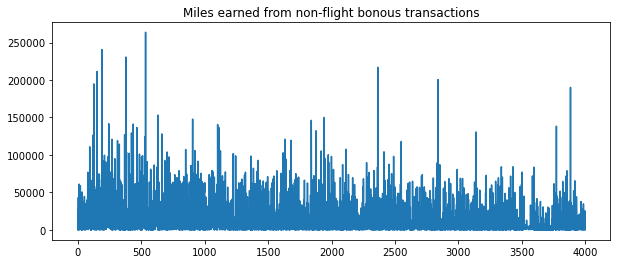

In [15]:
plt.figure(figsize=(10,4))
plt.plot(airlines_df.Bonus_miles)
plt.title("Miles earned from non-flight bonous transactions")

Text(0.5, 1.0, 'Non Flight bonous transactions in the past')

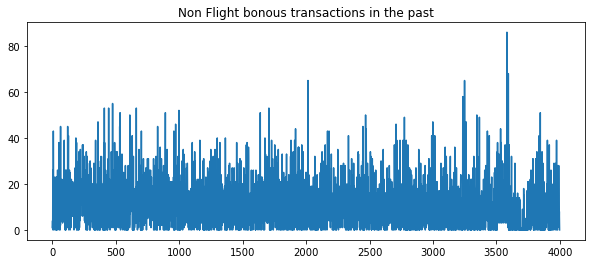

In [16]:
plt.figure(figsize=(10,4))
plt.plot(airlines_df.Bonus_trans)
plt.title("Non Flight bonous transactions in the past")

Text(0.5, 1.0, 'No of Flight miles in 12 months')

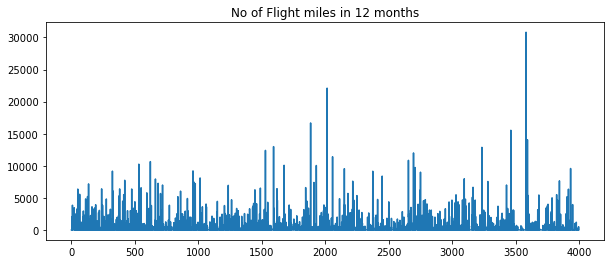

In [17]:
plt.figure(figsize=(10,4))
plt.plot(airlines_df.Flight_miles_12mo)
plt.title("No of Flight miles in 12 months")

Text(0.5, 1.0, 'No of flight transactions in 12 months')

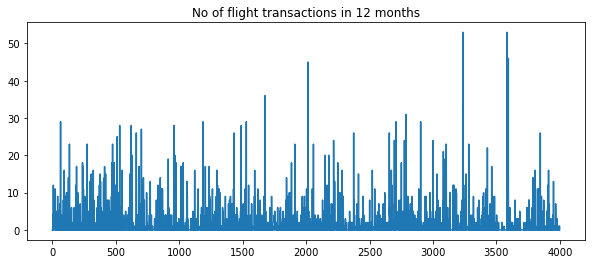

In [18]:
plt.figure(figsize=(10,4))
plt.plot(airlines_df.Flight_trans_12)
plt.title("No of flight transactions in 12 months")

Text(0.5, 1.0, 'No of Days Enrolled ')

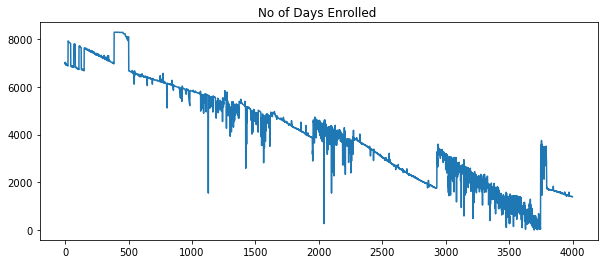

In [19]:
plt.figure(figsize=(10,4))
plt.plot(airlines_df.Days_since_enroll)
plt.title("No of Days Enrolled ")

Text(0.5, 1.0, 'Awarded Free Flight')

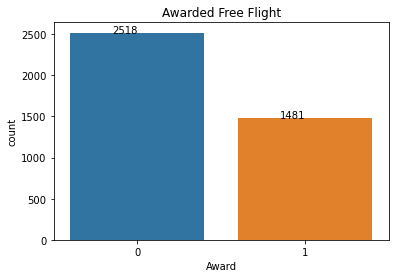

In [20]:
ax3=sns.countplot(x=airlines_df.Award)
for p in ax3.patches:
   ax3.annotate(p.get_height(),(p.get_x()+0.25, p.get_height()+0.01))

plt.title("Awarded Free Flight")

In [21]:
# There are about 37% who got the a free flight award

# Pre-Processing

In [22]:
# Making the data scale free

In [33]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
airlines_norm=scaler.fit_transform(airlines_df.iloc[:,1:])
airlines_norm[0:5,:]

array([[-0.45114078, -0.18629869, -0.76957841, -0.09824189, -0.06276658,
        -0.70278627, -1.10406452, -0.32860326, -0.36216787,  1.39545434,
        -0.7669193 ],
       [-0.53945687, -0.18629869, -0.76957841, -0.09824189, -0.06276658,
        -0.7010884 , -0.99992616, -0.32860326, -0.36216787,  1.37995704,
        -0.7669193 ],
       [-0.32003123, -0.18629869, -0.76957841, -0.09824189, -0.06276658,
        -0.5392527 , -0.79164945, -0.32860326, -0.36216787,  1.41192021,
        -0.7669193 ],
       [-0.58379852, -0.18629869, -0.76957841, -0.09824189, -0.06276658,
        -0.68928615, -1.10406452, -0.32860326, -0.36216787,  1.37220839,
        -0.7669193 ],
       [ 0.23967783, -0.18629869,  1.40947095, -0.09824189, -0.06276658,
         1.08312117,  1.49939447,  1.15493205,  0.69249029,  1.36397545,
         1.30391816]])

In [24]:
# Min Max scaling

# Normalization Method
def norm(i):
    x=((i-i.min())/(i.max()-i.min()))
    return(x)



In [25]:
airlines_MinMax=norm(airlines_df.iloc[:,1:])

# Hierarchical Clustering 

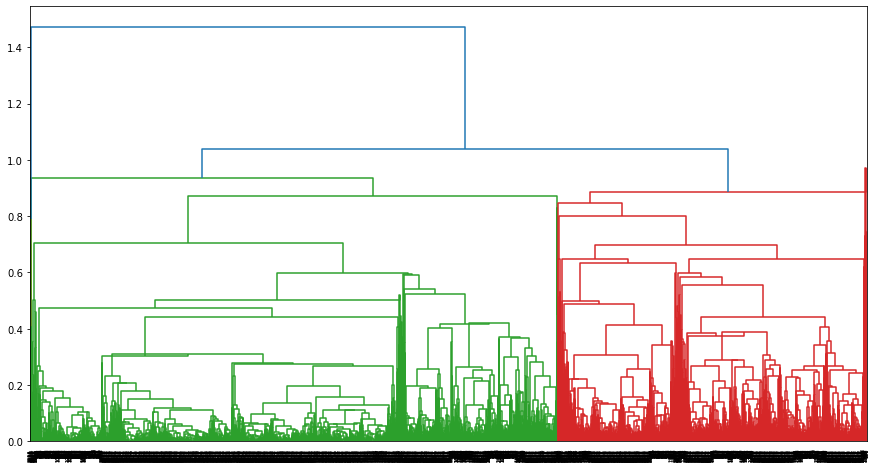

In [99]:
plt.figure(figsize=(15,8))
single=sch.dendrogram(sch.linkage(airlines_MinMax,method='centroid'))

In [ ]:
# centroid has 2 clusters

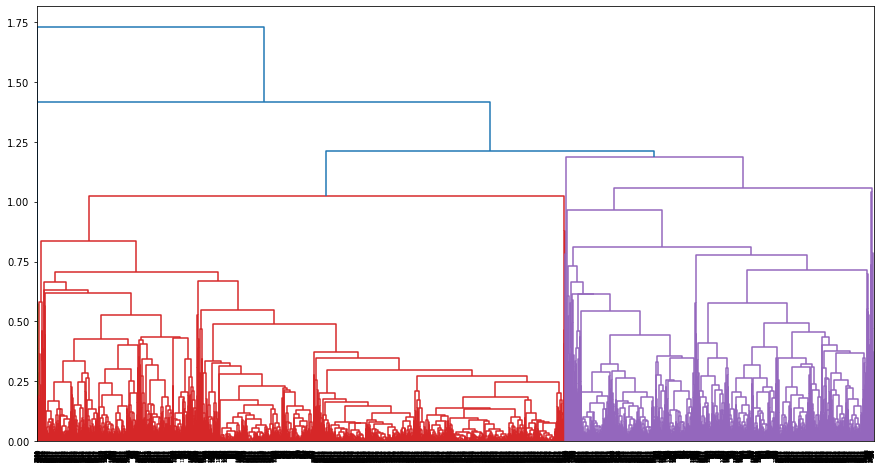

In [101]:
plt.figure(figsize=(15,8))
single=sch.dendrogram(sch.linkage(airlines_MinMax,method='average'))

In [ ]:
# Average linkage has 2 clusters

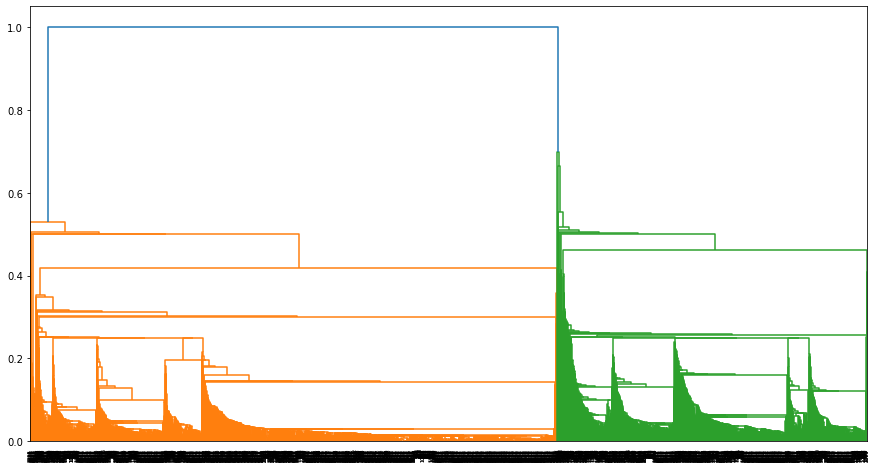

In [102]:
plt.figure(figsize=(15,8))
single=sch.dendrogram(sch.linkage(airlines_MinMax,method='single'))

In [ ]:
# Single linkage has 2 clusters

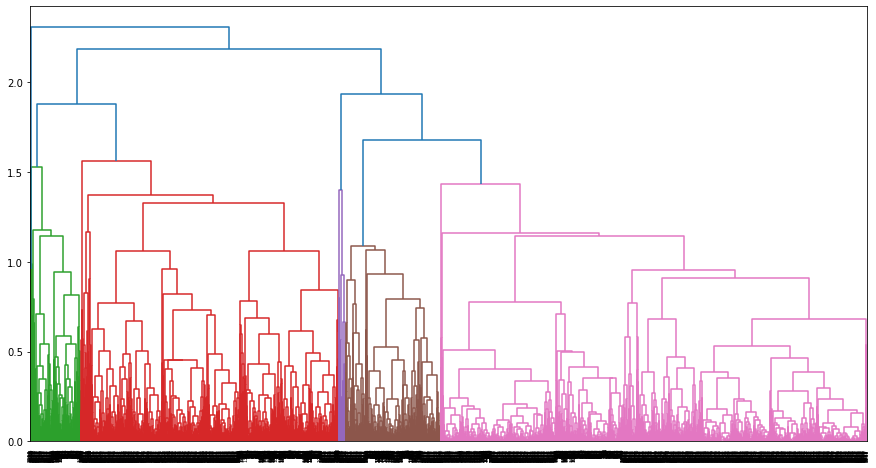

In [103]:
plt.figure(figsize=(15,8))
single=sch.dendrogram(sch.linkage(airlines_MinMax,method='complete'))

In [ ]:
#  complete linkage has 5 clusters 

In [104]:
# Aglomerative clustering
hc=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
cluster=hc.fit_predict(airlines_MinMax)
airlines_df['ClusterID_hierarchial']=pd.Series(cluster)

In [105]:
airlines_df.iloc[:,1:].groupby(airlines_df.ClusterID_hierarchial).mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterID_Kmean,ClusterID_dbscan,ClusterID_hierarchial
ClusterID_hierarchial,,,,,,,,,,,,,,
0,59971.432010,88.480947,1.712395,1.000401,1.008825,10215.097473,9.096270,227.057361,0.653028,3823.422383,0.000000,0.849178,-0.058163,0.0
1,177000.631799,215.393305,4.891213,1.000000,1.100418,81120.820084,24.577406,1256.213389,3.857741,5481.799163,1.000000,0.523013,0.071130,1.0
2,81640.270292,245.019481,2.237825,1.008929,1.002435,18662.665584,13.853896,714.199675,2.179383,4465.961039,1.000000,0.674513,0.641234,2.0
3,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000,1.000000,3.000000,-1.000000,3.0
4,45515.064516,32.258065,1.000000,2.483871,1.000000,14618.870968,16.129032,443.225806,1.967742,3784.258065,0.193548,4.000000,0.161290,4.0


# K Means Clustering

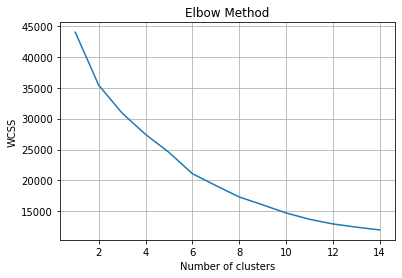

In [34]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(airlines_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 15), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

Text(0.5, 1.0, 'Silhouette score')

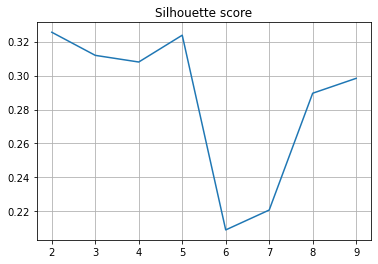

In [63]:
# Kmeans algorithm

sc=[]
for i in range(2,10):
    kmeans_cluster=KMeans(n_clusters=i)
    kmeans_cluster.fit(airlines_norm)
    sc.append(metrics.silhouette_score(airlines_norm,kmeans_cluster.labels_))
    
    
plt.plot(range(2,10),sc)
plt.grid()
plt.title("Silhouette score")
    
#kmeans_cluster=KMeans(n_clusters=4)
#kmeans_cluster.fit(airlines_norm)
#clusters=pd.Series(kmeans_cluster.labels_).value_counts()
#print(clusters)

In [69]:
kmeans_cluster=KMeans(n_clusters=5)
kmeans_cluster.fit(airlines_norm)
pd.Series(kmeans_cluster.labels_).value_counts()

1    2500
0    1272
3     169
4      43
2      15
dtype: int64

In [70]:
airlines_df['ClusterID_Kmean']=kmeans_cluster.labels_

In [71]:
airlines_df.groupby('ClusterID_Kmean').mean()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterID_dbscan
ClusterID_Kmean,,,,,,,,,,,,,
0,1593.275943,116436.737421,134.935535,3.702830,1.000000,1.001572,39185.495283,18.721698,329.176101,0.985063,4897.754717,0.644654,0.357704
1,2245.518400,43669.876000,95.611600,1.221200,1.000000,1.000400,4568.151200,6.791600,197.838000,0.615200,3684.750400,0.200000,0.154800
2,1664.866667,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667,0.533333,-1.000000
3,1741.207101,189448.964497,967.248521,2.201183,1.000000,1.000000,31108.467456,26.201183,5288.775148,15.284024,4665.248521,0.804734,-0.928994
4,2269.372093,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,-0.162791


<AxesSubplot:xlabel='ClusterID_Kmean', ylabel='count'>

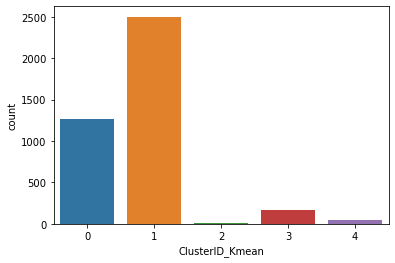

In [72]:
sns.countplot(x='ClusterID_Kmean',data=airlines_df)

In [ ]:
# IN K Means clustering we get better silhoutte score if there are 5 clusters. 

# DBSCAN

In [93]:
# DBSCAN algorithm
from sklearn.cluster import DBSCAN
db_scan=DBSCAN(eps=1.25 ,min_samples=12)  # min_samples >= no of dimensions + 1
db_scan.fit(airlines_norm)

# silhouette score
from sklearn import metrics
print("silhouette score : ",metrics.silhouette_score(airlines_norm,db_scan.labels_))

silhouette score :  0.23560284008112886


In [94]:
pd.Series(db_scan.labels_).value_counts()

 0    2348
 1    1139
-1     500
 2      12
dtype: int64

In [95]:
airlines_df['ClusterID_dbscan']=db_scan.labels_

In [96]:
airlines_df.groupby('ClusterID_dbscan').mean()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award,ClusterID_Kmean
ClusterID_dbscan,,,,,,,,,,,,,
-1,1733.466000,190565.986000,1086.43800,2.652000,1.092,1.098,39739.232000,22.150000,2298.632000,6.696000,4676.342000,0.684,1.442000
0,2179.403322,53923.798126,7.09029,1.669932,1.000,1.000,9249.505963,8.557496,145.790886,0.439949,3806.580068,0.000,0.833475
1,1793.519754,63259.956102,14.43986,2.613696,1.000,1.000,23596.129061,13.241440,305.162423,0.973661,4525.335382,1.000,0.424056
2,2539.333333,31879.000000,0.00000,1.000000,2.000,1.000,8232.750000,12.166667,45.833333,0.250000,3311.750000,0.000,4.000000


<AxesSubplot:xlabel='ClusterID_dbscan', ylabel='count'>

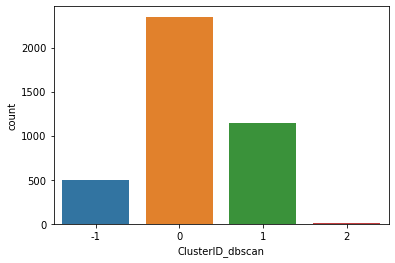

In [97]:
sns.countplot(x='ClusterID_dbscan',data=airlines_df)

In [98]:
# silhouette score
from sklearn import metrics
print("silhouette score : ",metrics.silhouette_score(airlines_norm,db_scan.labels_))

silhouette score :  0.23560284008112886


In [ ]:
# IN DBSAN we are having a better Silhouette score if we have 3 clusters formed and there are about 500 Outliers found